In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:

# !python -m pip install --upgrade numpy

In [3]:
df_train = pd.read_csv('D:/Study/Python/data-set/Titanic/train.csv')
df_test = pd.read_csv('D:/Study/Python/data-set/Titanic/test.csv')
df_test_orig = df_test.copy()

In [4]:
df_corr = df_train.corr()
df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


[Text(0, 0.5, 'PassengerId'),
 Text(0, 1.5, 'Survived'),
 Text(0, 2.5, 'Pclass'),
 Text(0, 3.5, 'Age'),
 Text(0, 4.5, 'SibSp'),
 Text(0, 5.5, 'Parch'),
 Text(0, 6.5, 'Fare')]

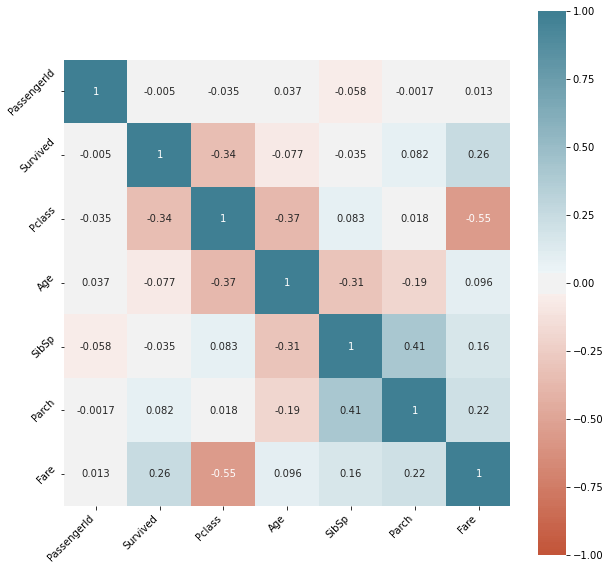

In [5]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(data=df_corr, vmax=1, vmin=-1, center=0, annot=True, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(),    rotation=45,    horizontalalignment='right')
ax.set_yticklabels(    ax.get_yticklabels(),  rotation=45, verticalalignment='center')

<ipython-input-6-96214a8ba940>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby(['Sex', 'Survived'])['Pclass', 'Age', 'Embarked'].plot(kind='hist')


Sex     Survived
female  0           AxesSubplot(0.125,0.125;0.775x0.755)
        1           AxesSubplot(0.125,0.125;0.775x0.755)
male    0           AxesSubplot(0.125,0.125;0.775x0.755)
        1           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

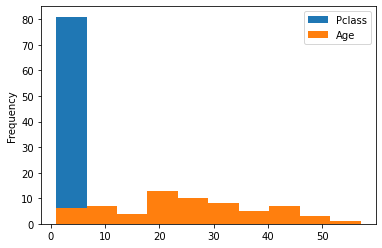

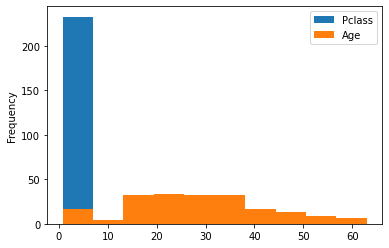

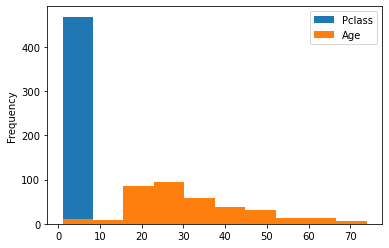

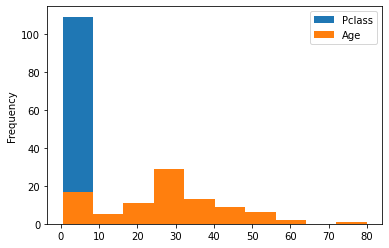

In [6]:
df_train.groupby(['Sex', 'Survived'])['Pclass', 'Age', 'Embarked'].plot(kind='hist')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barton, Mr. David John",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train[['Sex']].describe()

,Sex
count,891
unique,2
top,male
freq,577


In [11]:
df_train['Embarked'].fillna(df_train['Embarked'].describe()['top'], inplace=True)
df_test['Embarked'].fillna(df_train['Embarked'].describe()['top'], inplace=True)

df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
df_train[['Survived', 'Embarked']].groupby('Embarked').sum()

,Survived
Embarked,
C,93
Q,30
S,219


In [13]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


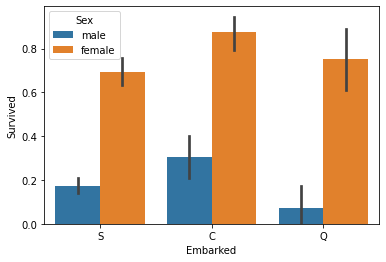

In [14]:
sns.barplot(data=df_train, x='Embarked', y='Survived', hue='Sex')

In [15]:
df_grouped_temp = df_train.groupby(['Embarked', 'Sex']).count().reset_index()[['Embarked', 'Sex', 'Survived']].sort_values(['Survived'], ascending=True).reset_index(drop=True)
df_grouped_temp

,Embarked,Sex,Survived
0,Q,female,36
1,Q,male,41
2,C,female,73
3,C,male,95
4,S,female,205
5,S,male,441


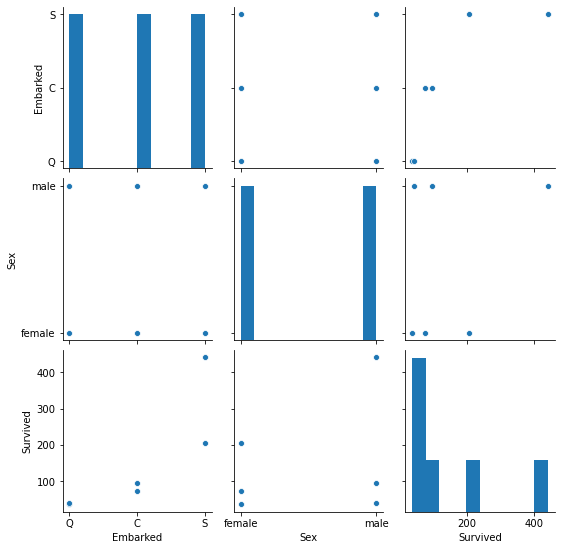

In [16]:
sns.pairplot(df_grouped_temp, vars=['Embarked', 'Sex', 'Survived'], kind='scatter')

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [19]:
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(".")[0].split(",")[1].strip())
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(".")[0].split(",")[1].strip())
print(df_train['Title'].unique())
df_test['Title'].unique()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [20]:
title_unique = df_train['Title'].unique()
title_unique

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [21]:
df_train['Title'] = df_train.apply(lambda x:'Others' if x['Title'] not in title_unique else x['Title'], axis=1)
df_test['Title'] = df_test.apply(lambda x:'Others' if x['Title'] not in title_unique else x['Title'], axis=1)

In [22]:
#df.loc[((df['Title']=='Mme') | (df['Title']=='Mlle') | (df['Title']=='Ms')), 'Title'] = 'Miss'
df_train.loc[(df_train['Title'].isin(['Mme', 'Mlle', 'Ms'])), 'Title'] = 'Miss'
df_test.loc[(df_test['Title'].isin(['Mme', 'Mlle', 'Ms'])), 'Title'] = 'Miss'



df_train.groupby('Title').agg({'Title':'count'})

,Title
Title,
Capt,1
Col,2
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40
Miss,186


In [23]:
df_train['Age'].describe()[['min', 'max']]

min     0.42
max    80.00
Name: Age, dtype: float64

In [24]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [25]:
age_dict = df_train.groupby(['Sex', 'Pclass']).apply(lambda x:x.agg({'Age':'median'}))['Age'].to_dict()
age_dict

{('female', 1): 35.0,
 ('female', 2): 28.0,
 ('female', 3): 21.5,
 ('male', 1): 40.0,
 ('male', 2): 30.0,
 ('male', 3): 25.0}

In [26]:
df_train['Age_d'] = df_train.apply(lambda x:age_dict[(x['Sex'], x['Pclass'])] if pd.isna(x['Age']) else x['Age'], axis=1)
df_test['Age_d'] = df_test.apply(lambda x:age_dict[(x['Sex'], x['Pclass'])] if pd.isna(x['Age']) else x['Age'], axis=1)

In [27]:
df_train['Age_g'] = pd.cut(df_train['Age_d'], range(0, 101, 10)).apply(lambda x:f'{x.left+1}-{x.right}')
df_test['Age_g'] = pd.cut(df_test['Age_d'], range(0, 101, 10)).apply(lambda x:f'{x.left+1}-{x.right}')

In [28]:
df_train[df_train['Age']%5==0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_d,Age_g
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0,31-40
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr,20.0,11-20
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs,55.0,51-60
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,Mr,35.0,31-40
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss,15.0,11-20
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don,40.0,31-40
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S,Mrs,40.0,31-40
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Mr,65.0,61-70
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S,Miss,5.0,1-10


In [29]:
df_train[df_train['Age'].isna()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_d,Age_g
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,25.0,21-30
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,30.0,21-30
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,21.5,21-30
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,25.0,21-30
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,21.5,21-30
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr,25.0,21-30
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs,35.0,31-40
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss,21.5,21-30
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr,25.0,21-30
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,Mr,25.0,21-30


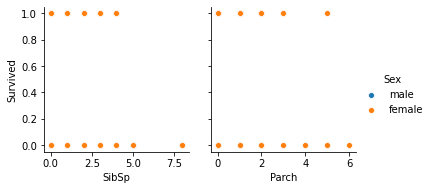

In [30]:
sns.pairplot(df_train, x_vars=['SibSp', 'Parch'], y_vars=['Survived'], hue='Sex', kind='scatter')

<ipython-input-31-e4f400100a99>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ab = df_train.groupby('Survived')['SibSp', 'Parch'].plot(kind='hist', legend=True)


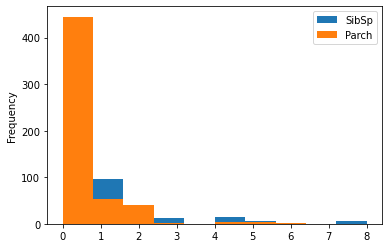

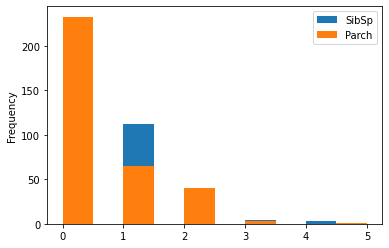

In [31]:
ab = df_train.groupby('Survived')['SibSp', 'Parch'].plot(kind='hist', legend=True)


In [32]:
df_train['IsAlone'] = df_train.apply(lambda row:0 if row['Parch']+row['SibSp']+1>1 else 1, axis=1)
df_test['IsAlone'] = df_test.apply(lambda row:0 if row['Parch']+row['SibSp']+1>1 else 1, axis=1)

In [33]:
df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

In [34]:
col_names = ['Sex', 'Pclass', 'Age_g', 'IsAlone', 'Title']
col_names_to_encode = ['Sex', 'Pclass', 'Age_g', 'IsAlone', 'Title']
#col_names = ['Sex', 'Pclass', 'Age_d', 'IsAlone', 'Embarked', 'Survived']
#col_names_to_encode = ['Sex', 'Pclass', 'Embarked', 'IsAlone']

df_train = df_train_orig[col_names]
df_test = df_test_orig[col_names]

df_train = pd.get_dummies(df_train, columns=col_names_to_encode, drop_first=True)
df_test = pd.get_dummies(df_test, columns=col_names_to_encode, drop_first=True)
df_train.head()

In [35]:
#for col in col_names_to_encode:
#    df_train[col] = oe_dict[col].transform(df_train[col]
#    df_test[col] = oe_dict[col].transform(df_test[col]

In [36]:
df_train.head()

,Sex,Pclass,Age_g,IsAlone,Title
0,male,3,21-30,0,Mr
1,female,1,31-40,0,Mrs
2,female,3,21-30,1,Miss
3,female,1,31-40,0,Mrs
4,male,3,31-40,1,Mr


In [37]:
df_test.head()

,Sex,Pclass,Age_g,IsAlone,Title
0,male,3,31-40,1,Mr
1,female,3,41-50,0,Mrs
2,male,2,61-70,1,Mr
3,male,3,21-30,1,Mr
4,female,3,21-30,0,Mrs


In [38]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
       'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

In [39]:
df_train_encoded = pd.get_dummies(df_train[col_names_to_encode], columns=col_names_to_encode)
df_test_encoded = pd.get_dummies(df_test[col_names_to_encode], columns=col_names_to_encode)


In [40]:
corr = df_train_encoded.corr()
corr

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_g_1-10,Age_g_11-20,Age_g_21-30,Age_g_31-40,Age_g_41-50,...,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess
Sex_female,1.000000,-1.000000,0.098013,0.064746,-0.137143,0.076844,0.038347,-0.037375,-0.006930,0.005509,...,-0.024728,0.045439,-0.034990,-0.159934,0.696282,-0.867334,0.547600,-0.060741,-0.024728,0.045439
Sex_male,-1.000000,1.000000,-0.098013,-0.064746,0.137143,-0.076844,-0.038347,0.037375,0.006930,-0.005509,...,0.024728,-0.045439,0.034990,0.159934,-0.696282,0.867334,-0.547600,0.060741,0.024728,-0.045439
Pclass_1,0.098013,-0.098013,1.000000,-0.288585,-0.626738,-0.126938,-0.077165,-0.272432,0.220506,0.143240,...,0.059256,0.059256,0.083847,-0.084700,0.025190,-0.097288,0.088207,-0.046578,0.059256,0.059256
Pclass_2,0.064746,-0.064746,-0.288585,1.000000,-0.565210,0.040625,-0.047538,-0.032852,0.032781,0.011644,...,-0.017100,-0.017100,-0.024197,0.009903,-0.023268,-0.088569,0.121239,0.161400,-0.017100,-0.017100
Pclass_3,-0.137143,0.137143,-0.626738,-0.565210,1.000000,0.076307,0.105175,0.261466,-0.216668,-0.132893,...,-0.037138,-0.037138,-0.052550,0.064918,-0.002767,0.155907,-0.174671,-0.091225,-0.037138,-0.037138
Age_g_1-10,0.076844,-0.076844,-0.126938,0.040625,0.076307,1.000000,-0.107092,-0.238246,-0.142404,-0.090926,...,-0.009325,-0.009325,-0.013195,0.632402,0.188658,-0.327075,-0.112377,-0.022906,-0.009325,-0.009325
Age_g_11-20,0.038347,-0.038347,-0.077165,-0.047538,0.105175,-0.107092,1.000000,-0.329691,-0.197061,-0.125826,...,-0.012904,-0.012904,-0.018259,-0.034963,0.107020,-0.004941,-0.068760,-0.031697,-0.012904,-0.012904
Age_g_21-30,-0.037375,0.037375,-0.272432,-0.032852,0.261466,-0.238246,-0.329691,1.000000,-0.438402,-0.279924,...,-0.028707,-0.028707,-0.040621,-0.141793,0.040802,0.120815,-0.090857,-0.014964,-0.028707,-0.028707
Age_g_31-40,-0.006930,0.006930,0.220506,0.032781,-0.216668,-0.142404,-0.197061,-0.438402,1.000000,-0.167315,...,0.065482,-0.017159,-0.024280,-0.110981,-0.113151,0.054129,0.119879,-0.042149,-0.017159,0.065482
Age_g_41-50,0.005509,-0.005509,0.143240,0.011644,-0.132893,-0.090926,-0.125826,-0.279924,-0.167315,1.000000,...,-0.010956,0.102554,0.064806,-0.070863,-0.111777,0.000761,0.119667,0.019559,0.102554,-0.010956


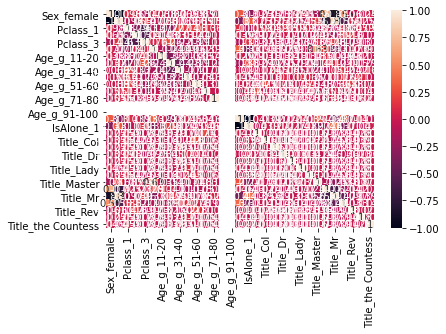

In [41]:
sns.heatmap(corr, annot=True)

In [42]:
X = df_train_encoded
X

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_g_1-10,Age_g_11-20,Age_g_21-30,Age_g_31-40,Age_g_41-50,...,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
888,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
889,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
y = df_train_orig['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [45]:
X_train

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_g_1-10,Age_g_11-20,Age_g_21-30,Age_g_31-40,Age_g_41-50,...,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir,Title_the Countess
811,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
29,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
49,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
105,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
616,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
223,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
271,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
474,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
clf=RandomForestClassifier(n_estimators=100, max_features='sqrt')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106   6]
 [ 27  40]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       112
           1       0.87      0.60      0.71        67

    accuracy                           0.82       179
   macro avg       0.83      0.77      0.79       179
weighted avg       0.82      0.82      0.81       179



In [58]:
[x for x in df_test_encoded.columns if x not in(df_train_encoded.columns)]

['Title_Others']

In [59]:
[x for x in df_train_encoded.columns if x not in(df_test_encoded.columns)]

['Title_Capt',
 'Title_Don',
 'Title_Jonkheer',
 'Title_Lady',
 'Title_Major',
 'Title_Sir',
 'Title_the Countess']

In [50]:
test_data=df_test_encoded
test_data

,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_g_1-10,Age_g_11-20,Age_g_21-30,Age_g_31-40,Age_g_41-50,...,IsAlone_0,IsAlone_1,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Title_Rev
0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
414,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
415,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
416,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [51]:
test_data.isna().sum().sum()

0

In [52]:
result = clf.predict(test_data)

ValueError: Number of features of the model must match the input. Model n_features is 31 and input n_features is 25 

In [ ]:
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

In [ ]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_1.csv", index=False)

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
test_data=df_test_encoded[X_test.columns]
test_data

In [ ]:

result_df = pd.DataFrame(result, columns=['Survived'])
result_df

In [ ]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_2.csv", index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### this takes almost 30 min to execute, hence commenting out
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### This too takes almost 20 minutes... so commenting out
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [100, 50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
log_regression_model = LogisticRegression(solver='lbfgs', C=10.0, random_state=0, max_iter=1000)

In [ ]:
log_regression_model.fit(X_train, y_train)

In [ ]:
y_pred = log_regression_model.predict(X_test)

In [ ]:
log_regression_model.score(X_test, y_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
result = log_regression_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

In [ ]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_3.csv", index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=15)
KNN_classifier.fit(X_train, y_train)

In [ ]:
y_pred = KNN_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
result = KNN_classifier.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

In [ ]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_4.csv", index=False)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier_model = XGBClassifier(learning_rate=0.01, n_estimators=100, random_state=0, max_depth=6)
xgb_classifier_model.fit(X_train, y_train)

In [ ]:
y_pred = xgb_classifier_model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
result = xgb_classifier_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df

In [ ]:
final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_5.csv", index=False)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes_model = GaussianNB()

In [ ]:
naive_bayes_model.fit(X_train, y_train)

In [ ]:
y_pred = naive_bayes_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
result = naive_bayes_model.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df





In [ ]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [ ]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_6.csv", index=False)

In [ ]:
from sklearn import svm

#### random forest
#### randomforest scaled fit
#### logistic regression
#### KNN
#### XGBoost
#### Naive bayes
#### SVC

In [ ]:
svc_classifier = svm.SVC(C=50.0, kernel='rbf', gamma='scale')
svc_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svc_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
result = svc_classifier.predict(test_data)
result_df = pd.DataFrame(result, columns=['Survived'])
result_df





In [ ]:

final_result_df = pd.concat([df_test_orig[['PassengerId']], result_df], axis=1)
final_result_df

In [53]:
final_result_df.to_csv("D:/Study/Python/Projects/Titanic_Passengers_Survival_Predictions_7.csv", index=False)

NameError: name 'final_result_df' is not defined

In [ ]:
ridge_classifier = RidgeClassifier(alpha=0.1)
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
bagging_classifier = BaggingClassifier(n_estimators=10)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))